# Programming for Data Analytics Project 2020
***



### Project brief

For this project you must create a data set by simulating a real-world phenomenon of your choosing.  You may pick any phenomenon you wish. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the `numpy.random` package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate  the  types  of  variables  involved,  their  likely  distributions,  and  their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

<br>



## Introduction

I have divided this project into 4 sections, each one representing a bullet point listed in the brief above. 


<br>



## 1. Premier League Simulation
***

For this project, I simulate the phenomenon of home team performance in the English Premier League. The simulation is modelled on data from the 2018/19 season [1]. I use a data set which consists of 380 observations (representing each individual match that took place during the season). On a personal level, the most interesting variable is the result of each match (win, loss or draw). More specifically, I am curious to investigate some of the variables which may give an good indication as to the outcome of a match. I have chosen the following 4 variables with this in mind

* Goals scored (non-zero integer)
* Possession (non-zero integer)
* Shots (non-zero integer)
* Result (categorical)

In order to accurately simulate the real world data, it is necessary to examine the properties of these variables. This includes establishing the distribution of each one as well as the relationship between each of the them. 
<br>







<br>

***

## 2. Investigation of variables
***

<br>

### 2.1 Data preparation

<br>

Firstly, I import the relevant Python packages for the simulation. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br>

Next, I read in the csv file which contains the necessary real world data and perform some basic operations on it to get an overview of the data.

In [2]:
# Read in csv file
df = pd.read_csv("pl_stats.csv.html")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            380 non-null    int64  
 1   date_GMT                             380 non-null    object 
 2   status                               380 non-null    object 
 3   attendance                           380 non-null    int64  
 4   home_team_name                       380 non-null    object 
 5   away_team_name                       380 non-null    object 
 6   referee                              380 non-null    object 
 7   Game Week                            380 non-null    int64  
 8   Pre-Match PPG (Home)                 380 non-null    float64
 9   Pre-Match PPG (Away)                 380 non-null    float64
 10  home_ppg                             380 non-null    float64
 11  away_ppg                        

In [4]:
df[["team_a_xg", "team_b_xg"]]

,team_a_xg,team_b_xg
0,1.25,1.46
1,1.18,1.58
2,1.50,0.89
3,1.67,1.81
4,0.90,1.17
...,...,...
375,1.40,0.92
376,2.67,1.31
377,1.15,1.04
378,1.23,1.80


In [5]:
df.average_goals_per_match_pre_match.head(40)

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
15    0.00
16    0.00
17    0.00
18    0.00
19    0.00
20    3.00
21    3.00
22    3.00
23    2.50
24    1.50
25    3.00
26    2.00
27    1.00
28    3.00
29    3.00
30    2.00
31    4.50
32    4.00
33    2.50
34    5.00
35    2.50
36    3.50
37    2.50
38    4.50
39    2.75
Name: average_goals_per_match_pre_match, dtype: float64

In [6]:
# The describe() method gives a summary of the data contained in the data set
df.describe()

,timestamp,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,3.800000e+02,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.546145e+09,38186.847368,19.500000,1.480895,1.167632,1.615500,1.198000,1.568421,1.252632,2.821053,...,3.354763,3.219421,4.471316,5.381816,1.261000,1.821474,3.101158,5.897763,1.842316,1.908868
std,6.877351e+06,16720.334767,10.980313,0.831446,0.761209,0.590587,0.534085,1.312836,1.180031,1.601312,...,1.169849,2.962683,1.906924,5.540953,0.107498,0.312900,0.833400,2.032061,0.214528,0.228041
min,1.533928e+09,9980.000000,1.000000,0.000000,0.000000,0.470000,0.260000,0.000000,0.000000,0.000000,...,0.000000,1.070000,2.900000,1.120000,1.050000,1.200000,1.540000,2.300000,1.430000,1.380000
25%,1.540656e+09,25034.750000,10.000000,1.000000,0.630000,1.210000,0.840000,1.000000,0.000000,2.000000,...,2.922500,1.570000,3.350000,2.300000,1.180000,1.585000,2.450000,4.437500,1.690000,1.740000
50%,1.546018e+09,31948.000000,19.500000,1.470000,1.075000,1.475000,1.160000,1.000000,1.000000,3.000000,...,3.500000,2.300000,3.750000,3.350000,1.250000,1.770000,2.950000,5.500000,1.830000,1.890000
75%,1.551541e+09,53282.750000,29.000000,2.062500,1.610000,1.917500,1.542500,2.000000,2.000000,4.000000,...,4.000000,3.350000,4.850000,6.312500,1.330000,2.000000,3.600000,7.050000,1.962500,2.050000
max,1.557670e+09,81332.000000,38.000000,3.000000,3.000000,2.840000,2.320000,6.000000,6.000000,8.000000,...,8.000000,22.000000,15.750000,42.750000,1.570000,2.750000,5.650000,15.000000,2.800000,2.550000


<br>



In [7]:
# The head() method outputs the five first rows of the data set
df.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.0,0.0,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.0,0.0,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.0,0.0,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.0,0.0,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.0,0.0,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


<br>

There are 64 columns in the dataframe, each representing a different variable associated with each of the 380 matches played during the season. I am interested only in 4 variables (listed above) for the purposes of this project. Directly below, I use the `list` function to output each column header. This gives me a better picture of which ones I need to retain and which ones I will discard. I found the code for this on geeksforgeeks.org [2].

In [8]:
# Create a list of every column header
list(df.columns)

['timestamp',
 'date_GMT',
 'status',
 'attendance',
 'home_team_name',
 'away_team_name',
 'referee',
 'Game Week',
 'Pre-Match PPG (Home)',
 'Pre-Match PPG (Away)',
 'home_ppg',
 'away_ppg',
 'home_team_goal_count',
 'away_team_goal_count',
 'total_goal_count',
 'total_goals_at_half_time',
 'home_team_goal_count_half_time',
 'away_team_goal_count_half_time',
 'home_team_goal_timings',
 'away_team_goal_timings',
 'home_team_corner_count',
 'away_team_corner_count',
 'home_team_yellow_cards',
 'home_team_red_cards',
 'away_team_yellow_cards',
 'away_team_red_cards',
 'home_team_first_half_cards',
 'home_team_second_half_cards',
 'away_team_first_half_cards',
 'away_team_second_half_cards',
 'home_team_shots',
 'away_team_shots',
 'home_team_shots_on_target',
 'away_team_shots_on_target',
 'home_team_shots_off_target',
 'away_team_shots_off_target',
 'home_team_fouls',
 'away_team_fouls',
 'home_team_possession',
 'away_team_possession',
 'team_a_xg',
 'team_b_xg',
 'average_goals_per_m

As detailed above, I am interested in simulating premier league results of the home team for a full season based on 4 variables: Goals scored, Possession, Shots and Result. 
<br>



### 2.2 Aggregation

<br>

First, I set about aggregating the data set so that it contains all the columns relevant to the current project. The dependent variable (result) does not have its own column in the original data set so I will need to create this. In order to do that, I include the 'away_team_goal_count' in the dataframe below:

In [9]:
# Create dataframe with relevant variables
df1 = df[["away_team_goal_count", "home_team_goal_count", "home_team_possession", "home_team_shots"]]
df1         

,away_team_goal_count,home_team_goal_count,home_team_possession,home_team_shots
0,1,2,46,8
1,2,1,40,11
2,0,2,62,11
3,2,0,66,11
4,3,0,37,6
...,...,...,...,...
375,0,2,59,11
376,2,0,73,21
377,1,1,53,7
378,2,2,55,9


<br>



In order to create and fill the result column, I use the code below. The `np.where()` function enables us to compare values in different columns. There is some useful information available online for this function [3], [4]. I create a new column called 'home_team_result' and assign a value to each row: W = win, L = lose, D = draw

**note: this operation raises a SettingWithCopyWarning. I have checked the documentation and many discussions and blog posts about this but have not managed to find a solution to date**


In [10]:
df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W', 
         (np.where(df1['away_team_goal_count'] == df1['home_team_goal_count'], 'D', 'L')))


<ipython-input-10-27f1615fb517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W',


In [11]:
df1

,away_team_goal_count,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,1,2,46,8,W
1,2,1,40,11,L
2,0,2,62,11,W
3,2,0,66,11,L
4,3,0,37,6,L
...,...,...,...,...,...
375,0,2,59,11,W
376,2,0,73,21,L
377,1,1,53,7,D
378,2,2,55,9,D


<br>



The 'away_team_goal_count' column is no longer relevant for the purposes of the project so I delete that column:

In [12]:
# Delete superfluous column
del df1["away_team_goal_count"]

In [13]:
# Output dataframe with desired variables
df1

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,2,46,8,W
1,1,40,11,L
2,2,62,11,W
3,0,66,11,L
4,0,37,6,L
...,...,...,...,...
375,2,59,11,W
376,0,73,21,L
377,1,53,7,D
378,2,55,9,D


<br>

### 2.2 Variable relationships and properties

<br>

Now that I have the 4 variables I am interested in, I investigate the properties of each one and their relationships with each other. 
<br> 

In this section, I split my dataframe into 3 separate dataframes, one will contain all of the data for when the home team won, another for when they lost and other for when the result was a draw. This is executed using code I sourced on stackoverflow.com [5]. 

Analysis will be done on each of these three subsets and then compared with each other. First, I investigate variables when the result was a win.
<br>

<br>

#### 2.2.1 Win dataset

Below, I investigate the data for when the home team won the match

<br>

In [14]:
# Split dataframe based on result (wins)
win_only = df1.loc[df1['home_team_result'] == 'W']
win_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,2,46,8,W
2,2,62,11,W
5,2,53,15,W
7,4,64,16,W
11,2,58,11,W
...,...,...,...,...
363,1,39,16,W
366,3,58,16,W
369,1,61,16,W
372,5,45,16,W


<br>



Create series of home team goal count data only and output a summary description using `describe()`:

In [15]:
# Create series with home team goal count data only
win_goals = win_only['home_team_goal_count']

# Summary of goal count data
win_goals.describe()

count    181.000000
mean       2.535912
std        1.132884
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: home_team_goal_count, dtype: float64

<br>



Next, I plot this data on a bar chart in order to get a visualisation of the distribution. The `value_counts` function counts the unique values in a single column [6], while `sort_index` sorts these values [7]. We now have an overall view of the distribution of number of goals the winning team scored.

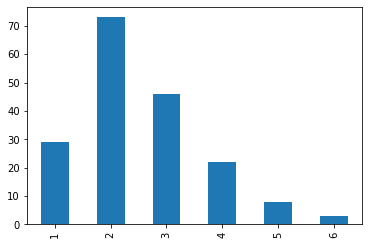

In [16]:
# Create series containing count of number of goals scored
win_goals_distribution = win_only['home_team_goal_count'].value_counts()

# Sort values
win_goals_distribution = win_goals_distribution.sort_index()

# Plot on a bar chart
win_goals_distribution.plot(kind='bar')

In [43]:
win_goals_distribution

1    29
2    73
3    46
4    22
5     8
6     3
Name: home_team_goal_count, dtype: int64

In [44]:
one = 29/181
two = 73/181
three = 46/181
four = 22/181
five = 8/181
six = 3/181

In [45]:
one

0.16022099447513813

In [46]:
two

0.40331491712707185

In [47]:
three

0.2541436464088398

In [54]:
four

0.12154696132596685

In [55]:
five

0.04419889502762431

In [56]:
six

0.016574585635359115

In [50]:
rng.choice([1, 7], 20, p=[0.1, 0, 0.3, 0.6, 0])

array([2, 2, 2], dtype=int64)

In [64]:
goals_array = [1, 2, 3, 4, 5, 6]
sim_goals = rng.choice(goals_array, 181, p=[0.16, 0.40, 0.25, 0.12, 0.05, 0.02])

(array([26.,  0., 75.,  0., 44.,  0., 20.,  0., 10.,  6.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

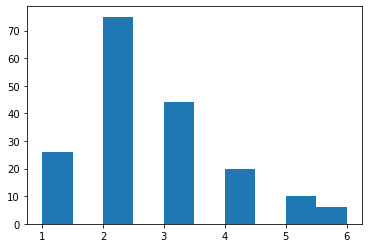

In [65]:
plt.hist(sim_goals)

In [60]:
0.16 + 0.40 + 0.25 + 0.12 + 0.05 + 0.02

1.0

The home team won the match much more often with two goals than with any other number of goals (from 1 to 6). Presumably the probability of winning increases the more goals a team scores.

<br>



Below, I do the same with the possession and shots variables:

In [17]:
# Create series with possession data only
win_possession = win_only["home_team_possession"]

# Summary of possession data
win_possession.describe()

count    181.000000
mean      53.867403
std       13.482255
min       23.000000
25%       43.000000
50%       55.000000
75%       64.000000
max       80.000000
Name: home_team_possession, dtype: float64

(array([ 2., 13., 22., 18., 22., 21., 31., 22., 19., 11.]),
 array([23. , 28.7, 34.4, 40.1, 45.8, 51.5, 57.2, 62.9, 68.6, 74.3, 80. ]),
 <a list of 10 Patch objects>)

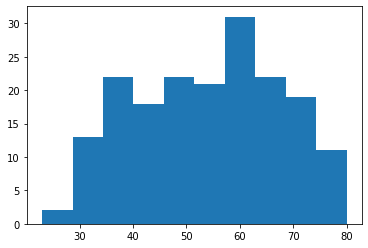

In [18]:
plt.hist(win_possession)
#plt.hist(win_only["home_team_possession"])

In [66]:
win_possession.describe()

count    181.000000
mean      53.867403
std       13.482255
min       23.000000
25%       43.000000
50%       55.000000
75%       64.000000
max       80.000000
Name: home_team_possession, dtype: float64

In [67]:
mu, sigma = 53.867403, 13.482255 # mean and standard deviation

s = np.random.default_rng().normal(mu, sigma, 200)

(array([ 7., 11., 27., 40., 38., 29., 23., 12.,  7.,  6.]),
 array([24.47690005, 30.88089679, 37.28489352, 43.68889026, 50.09288699,
        56.49688373, 62.90088046, 69.3048772 , 75.70887393, 82.11287067,
        88.5168674 ]),
 <a list of 10 Patch objects>)

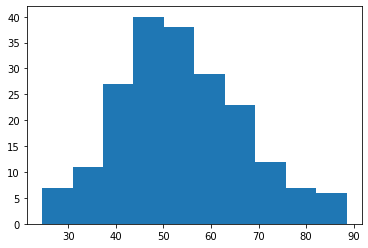

In [68]:
plt.hist(s)

In [19]:
win_shots = win_only['home_team_shots']
win_shots.describe()

count    181.000000
mean      12.696133
std        4.195426
min        5.000000
25%        9.000000
50%       13.000000
75%       16.000000
max       26.000000
Name: home_team_shots, dtype: float64

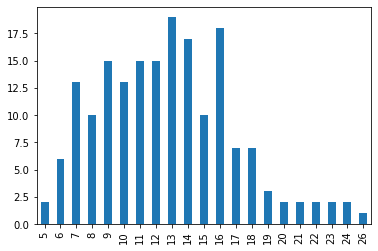

In [20]:
win_shots_distribution = win_only['home_team_shots'].value_counts()
win_shots_distribution = win_shots_distribution.sort_index()
win_shots_distribution.plot(kind='bar')

In [21]:
# Split dataframe based on result (losses)
lose_only = df1.loc[df1['home_team_result'] == 'L']
lose_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
1,1,40,11,L
3,0,66,11,L
4,0,37,6,L
9,0,42,8,L
14,1,61,9,L
...,...,...,...,...
370,1,23,6,L
371,1,39,12,L
373,0,68,11,L
376,0,73,21,L


<br>



In [22]:
# Split dataframe based on result (draws)
draw_only = df1.loc[df1['home_team_result'] == 'D']
draw_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
6,2,57,10,D
8,0,47,10,D
10,0,51,8,D
20,1,28,9,D
21,2,49,16,D
...,...,...,...,...
367,1,35,6,D
368,1,70,14,D
374,0,46,8,D
377,1,53,7,D


<br>



In [23]:
lose_possession = lose_only["home_team_possession"]

In [24]:
lose_possession.describe()

count    128.000000
mean      46.445312
std       13.953697
min       18.000000
25%       35.750000
50%       47.000000
75%       57.250000
max       78.000000
Name: home_team_possession, dtype: float64

In [25]:
lose_only['home_team_goal_count'].value_counts()

0    66
1    55
2     7
Name: home_team_goal_count, dtype: int64

In [26]:
draw_only['home_team_goal_count'].value_counts()

1    32
0    22
2    15
3     2
Name: home_team_goal_count, dtype: int64

In [27]:
minValuesObj = df["home_team_possession"].min()
minValuesObj

18

## 3. Simulation

***

In [78]:
goals_array = [1, 2, 3, 4, 5, 6]
sim_goals = rng.choice(goals_array, 200, p=[0.16, 0.40, 0.25, 0.12, 0.05, 0.02])

(array([26.,  0., 75.,  0., 44.,  0., 20.,  0., 10.,  6.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

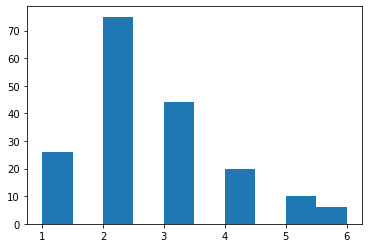

In [69]:
plt.hist(sim_goals)

https://towardsdatascience.com/how-to-generate-pseudo-random-datasets-in-python-start-from-scratch-with-numpy-faker-c5661e3bc58b code below taken from here

In [ ]:
for i in range(len(df)):
    if df["Claim Reason"][i]=="Medical":
        df["Claim Amount"][i]=np.random.randint(1300,2300)
    elif df["Claim Reason"][i]=="Travel":
        df["Claim Amount"][i]=np.random.randint(300,900)
    elif df["Claim Reason"][i]=="Phone":
        df["Claim Amount"][i]=np.random.randint(200,270)
    else:
        df["Claim Amount"][i]=np.random.randint(1,100)

In [ ]:
rng.choice

In [79]:
sim_result = ['W', 'L', 'D']

In [ ]:
sim_df = pd.DataFrame(sim_result, columns = ['Name', 'Age']) 

In [72]:
mu, sigma = 53.867403, 13.482255 # mean and standard deviation

sim_possession_norm = np.random.default_rng().normal(mu, sigma, 200)

(array([ 3.,  4., 13., 30., 42., 46., 33., 15.,  9.,  5.]),
 array([17.50598281, 24.63451408, 31.76304534, 38.89157661, 46.02010787,
        53.14863914, 60.27717041, 67.40570167, 74.53423294, 81.6627642 ,
        88.79129547]),
 <a list of 10 Patch objects>)

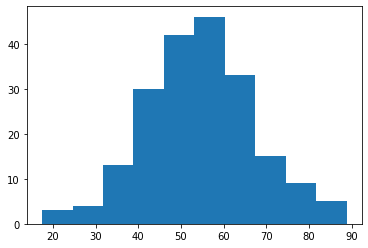

In [73]:
plt.hist(sim_possession_norm)

In [74]:
sim_possession_uni = np.random.default_rng().uniform(30,80,200)

(array([25., 24., 21., 16., 15., 16., 24., 26., 14., 19.]),
 array([30.29348562, 35.26365097, 40.23381631, 45.20398166, 50.174147  ,
        55.14431235, 60.1144777 , 65.08464304, 70.05480839, 75.02497374,
        79.99513908]),
 <a list of 10 Patch objects>)

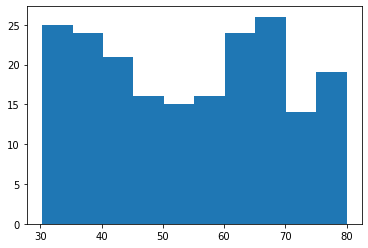

In [75]:
plt.hist(sim_possession_uni)

In [77]:
sim_possession_norm

array([59.61398712, 80.09002048, 58.61708047, 59.04815895, 47.91597975,
       68.40738523, 46.33034121, 65.24117252, 53.12163155, 66.80347779,
       69.20254063, 70.45834393, 48.42299704, 40.37292376, 51.70814643,
       56.16591413, 48.86168317, 68.59774291, 71.4687654 , 58.69711205,
       45.79189873, 46.68650407, 54.96265982, 54.88933551, 49.84582244,
       60.97569588, 81.0585886 , 52.82994132, 57.85142449, 53.09690144,
       18.5706188 , 45.51746203, 47.81773146, 53.89540632, 45.40059898,
       64.87296672, 56.42101782, 51.21515764, 59.92541219, 53.58187312,
       58.99804183, 37.91534867, 46.21784414, 45.17824281, 75.38608403,
       60.2724721 , 46.17402669, 41.04080075, 53.48624236, 74.60222657,
       36.03078035, 70.7645898 , 61.75875852, 64.48239379, 66.07410485,
       26.06859476, 60.29079928, 63.82184983, 57.04105913, 45.66737703,
       32.9802133 , 57.85261834, 43.62631949, 39.76944854, 40.55869484,
       69.36005788, 67.33199966, 43.65870304, 53.32467813, 39.36

In [76]:
rng.beta(3,1)

0.9310959071558315

### References
[1] footystats.org; https://footystats.org/download-stats-csv <br>
[2] How to get column names in Pandas dataframe; https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ <br>
[3] note.nkmk.me; https://note.nkmk.me/en/python-numpy-where/ <br>
[4] stackoverflow.com; https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions <br>
[5] stackoverflow.com; https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values <br>
[6] pydata.org; pandas.Series.value_counts; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html <br>
[7] pydata.org; pandas.Series.sort_index; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html <br>


In [40]:
rng = np.random.default_rng()

s = rng.poisson(2.5, 50)

In [41]:
s

array([5, 2, 3, 4, 4, 1, 5, 0, 4, 1, 2, 1, 1, 3, 1, 4, 0, 4, 3, 2, 2, 2,
       3, 3, 2, 4, 2, 4, 3, 1, 6, 1, 4, 4, 5, 5, 2, 2, 3, 4, 2, 2, 3, 3,
       0, 2, 2, 4, 2, 1], dtype=int64)

(array([ 3.,  8.,  0., 14.,  0.,  9., 11.,  0.,  4.,  1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

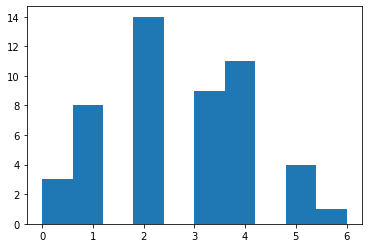

In [42]:
plt.hist(s)

**I will need to also have data for away team for comparison e.g. shots on goal, goals scored.**
* e.g. difference between winning team shots scored and losing team shots scored. Shots scored as a stand alone may not be enough info